<center><h1>Testing ADA library version 2</h1>
John Ignacio R.M. 28 Jun 2020</center>

In [1]:
#ada library
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada2.data import read_dataset, split_dataset
from ada2.model import BinClassifModelV1 as BC1
from ada2.plot import plot_confidence_matrix
import pandas as pd

Using TensorFlow backend.
Welcome to JupyROOT 6.20/04


In [2]:
source_path = "../processed_data/xtohh"
signal = "Xtohh2000"
bg = "Xtohh_background"
seed = 420

In [3]:
#read xtohh dataset SR 2
df = read_dataset(source_path, signal, bg, "SR", 2)
df.head()

,EventWeight,label,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.001020,1,885.55927,0.104927,-2.448576,127604.30,623.22710,-0.731510,0.656939,85368.720,3.105514,3.216185,-0.192894,237.88724,1631.6702,263.697630
1,0.001117,1,855.69904,0.313113,-1.859287,122862.90,449.37933,-0.306591,0.920655,55754.656,2.779941,2.848176,-0.019178,485.03333,1293.4028,463.512360
2,0.000925,1,552.47845,-0.702952,-2.549875,109091.67,631.70496,1.020756,0.610602,76213.550,3.122708,3.566858,-0.742126,104.55922,1659.8483,80.008150
3,0.001158,1,525.10590,-0.941433,-1.130162,82382.28,416.48105,0.103909,1.981465,58332.793,3.111627,3.282524,-0.130256,166.60722,1075.3092,109.524925
4,0.001120,1,916.44147,-0.683193,1.804695,115936.01,677.16440,-0.495132,-1.274429,94135.960,3.079124,3.084862,0.416606,167.35030,1595.7611,244.283460


In [4]:
sets = split_dataset(df, 0.6, 0.2, 0.2, seed)
sets["x"]["test"].head()

,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.749250,-0.007619,0.269247,-0.595509,-0.663850,-0.251179,-1.400927,-0.640053,0.517024,-0.455927,0.205128,1.580572,-0.959767,1.053371
1,-0.487231,-1.645908,-0.976440,-0.315604,0.283814,0.018971,0.721503,0.325856,-0.058305,0.282836,-2.421993,-0.791451,0.456776,-0.759217
2,0.062386,0.438165,-1.519515,-0.253454,0.001139,-0.971084,0.253001,-0.166082,0.819077,0.388274,0.179354,0.076119,0.064084,-0.159677
3,-0.635282,0.732828,-0.391213,-0.880138,1.643666,-0.128421,1.353376,0.063008,0.447789,-0.240012,-3.829960,-0.744103,0.307787,-1.342321
4,0.283358,-0.931026,-0.258978,-0.526190,-0.355228,-0.926530,1.585480,-0.310652,0.113246,-0.725873,0.276691,0.633660,-0.931907,0.394696


In [5]:
bc1_t2 = BC1(sets["x"]["test"].shape[1])
bc1_t2.load("../saved_models", "tag2_jun_2020")

2020-06-28 17:56:09.230739: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-28 17:56:09.242504: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-28 17:56:09.243054: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 960M computeCapability: 5.0
coreClock: 1.176GHz coreCount: 5 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 74.65GiB/s
2020-06-28 17:56:09.243101: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-06-28 17:56:09.243119: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-06-28 17:56:09.244690: I tensorflow/stream_executor/platform/def

In [8]:
eval = bc1_t2.complete_evaluation(
    sets["x"]["test"], sets["y"]["test"], sets["w"]["test"], 0.4,
)

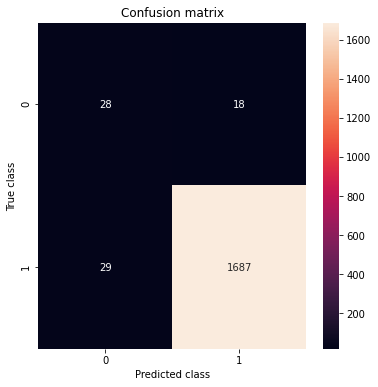

In [7]:
plot_confidence_matrix(eval["cm"], 6, 6, 'd')